# GAN 1d-distributions alignments
## Colab set-up

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount("/content/drive")

import os
folder_path = ---
os.chdir(folder_path)

In [0]:
# Import of the custom modules
import imp 
gan_models = imp.new_module("gan_models")
exec(open("./gan_models.py").read(), gan_models.__dict__)

## Example

In [0]:
import numpy as np
import torch
from gan_models import VGAN, WGAN, CycleGAN, plot_alignment_1d

In [0]:
# Basic distributions to test the alignments

def gaussian_0_1(n, mean=0., std=1.):
    return torch.empty(n).normal_(mean=mean,std=std).view(n,1)

def gaussian_5_2(n, mean=5., std=2.):
    return torch.empty(n).normal_(mean=mean,std=std).view(n,1)

### Training the three models to align N(0,1) -> N(5,2)

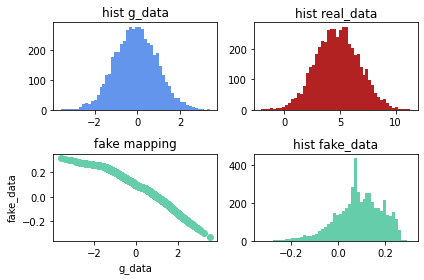

Epoch 0. G loss: 0.625024, D loss: 1.729530, Time per epoch: 1.264570 seconds


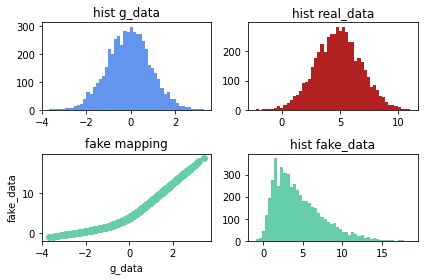

Epoch 2000. G loss: 0.678950, D loss: 1.342901, Time per epoch: 0.904242 seconds


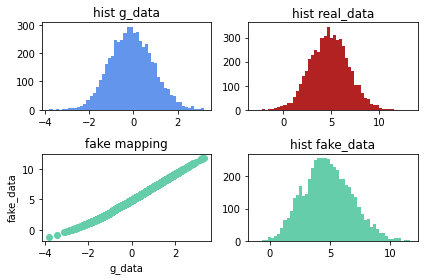

Epoch 4000. G loss: 0.691890, D loss: 1.384870, Time per epoch: 0.875504 seconds


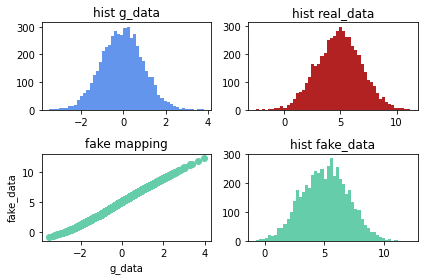

Epoch 6000. G loss: 0.677979, D loss: 1.388258, Time per epoch: 0.864858 seconds


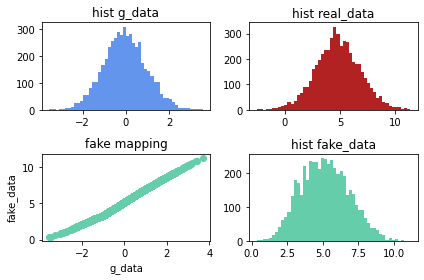

Epoch 8000. G loss: 0.728117, D loss: 1.383482, Time per epoch: 0.981276 seconds


In [5]:
vgan = VGAN(epochs=10000,
            g_data_generator=gaussian_0_1,
            real_data_generator=gaussian_5_2)
vgan.trainloop()

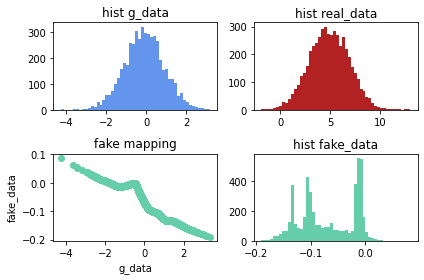

Epoch 0. G loss: -0.010154, C loss: 0.008153, Time per epoch: 0.919334 seconds


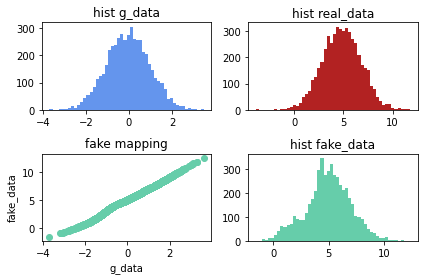

Epoch 2000. G loss: -0.010077, C loss: 0.000001, Time per epoch: 0.949241 seconds


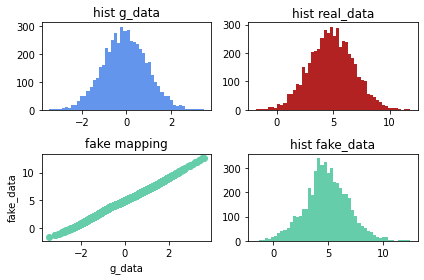

Epoch 4000. G loss: -0.010102, C loss: 0.000003, Time per epoch: 0.847333 seconds


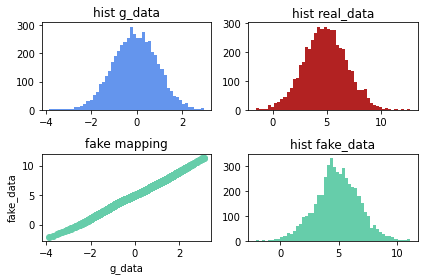

Epoch 6000. G loss: -0.010046, C loss: 0.000006, Time per epoch: 0.946789 seconds


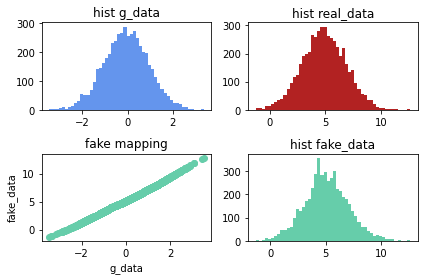

Epoch 8000. G loss: -0.010138, C loss: -0.000010, Time per epoch: 0.908220 seconds


In [6]:
wgan = WGAN(epochs=10000,
            g_data_generator=gaussian_0_1,
            real_data_generator=gaussian_5_2)
wgan.trainloop()

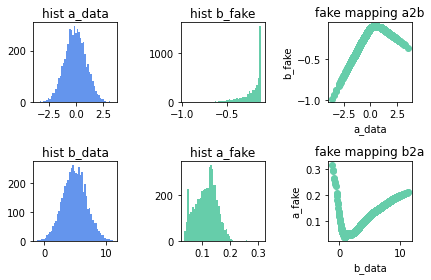

Epoch 0. GA2B loss: 1.018060, GB2A loss: 5.498120, DA loss: 0.250674,DB loss 0.251563, Time per epoch: 1.272610 seconds


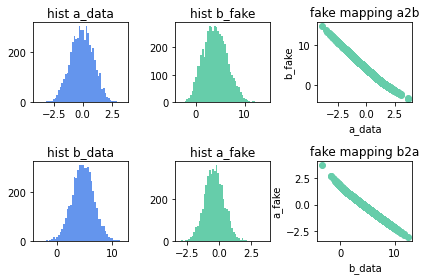

Epoch 2000. GA2B loss: 0.297512, GB2A loss: 0.284287, DA loss: 0.234053,DB loss 0.237816, Time per epoch: 1.262689 seconds


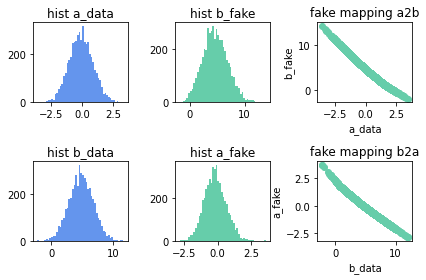

Epoch 4000. GA2B loss: 0.259225, GB2A loss: 0.276076, DA loss: 0.249240,DB loss 0.248709, Time per epoch: 1.211203 seconds


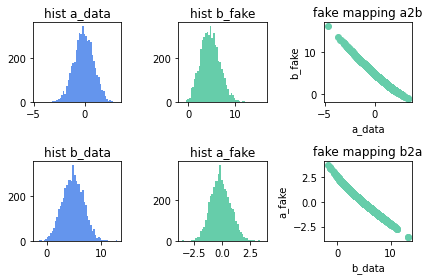

Epoch 6000. GA2B loss: 0.261214, GB2A loss: 0.263267, DA loss: 0.247123,DB loss 0.247646, Time per epoch: 1.334800 seconds


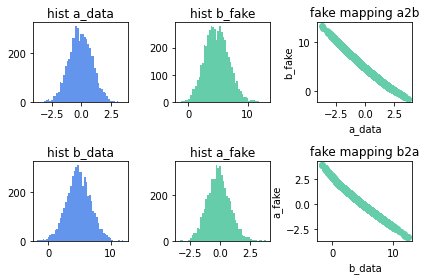

Epoch 8000. GA2B loss: 0.261161, GB2A loss: 0.257945, DA loss: 0.250522,DB loss 0.250225, Time per epoch: 1.204024 seconds


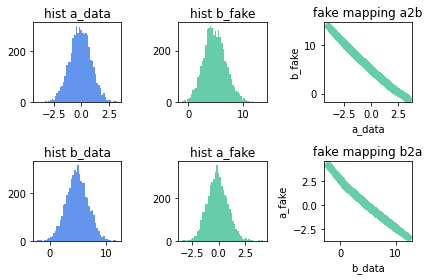

Epoch 10000. GA2B loss: 0.242470, GB2A loss: 0.255868, DA loss: 0.251299,DB loss 0.251981, Time per epoch: 1.246080 seconds


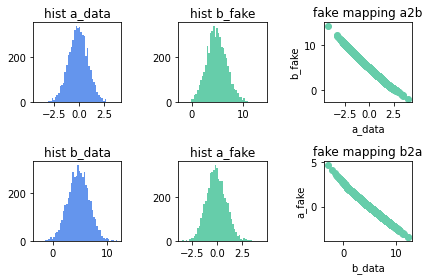

Epoch 12000. GA2B loss: 0.269680, GB2A loss: 0.259805, DA loss: 0.250786,DB loss 0.250686, Time per epoch: 1.171046 seconds


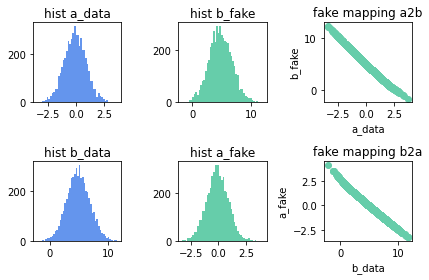

Epoch 14000. GA2B loss: 0.258459, GB2A loss: 0.252835, DA loss: 0.249605,DB loss 0.250390, Time per epoch: 1.277775 seconds


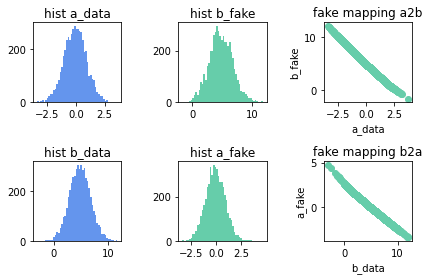

Epoch 16000. GA2B loss: 0.250117, GB2A loss: 0.253272, DA loss: 0.251187,DB loss 0.250888, Time per epoch: 1.264220 seconds


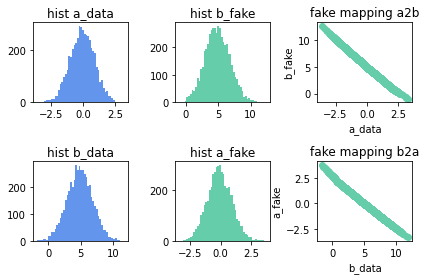

Epoch 18000. GA2B loss: 0.258004, GB2A loss: 0.268029, DA loss: 0.249195,DB loss 0.249014, Time per epoch: 1.363153 seconds


In [7]:
cyclegan = gan = CycleGAN(epochs=20000,
                          a_data_generator=gaussian_0_1,
                          b_data_generator=gaussian_5_2)
cyclegan.trainloop()

### Evaluating the performance of the three models

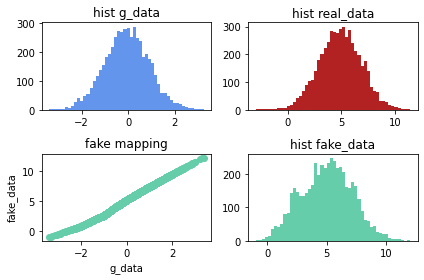

In [8]:
g_data, real_data, fake_data = vgan.eval_performance()
plot_alignment_1d(g_data, fake_data, real_data)

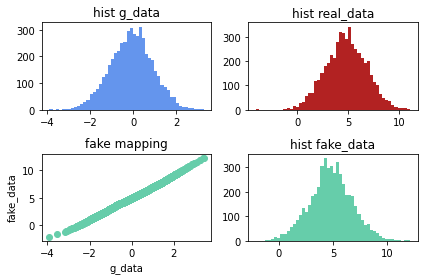

In [9]:
g_data, real_data, fake_data = wgan.eval_performance()
plot_alignment_1d(g_data, fake_data, real_data)

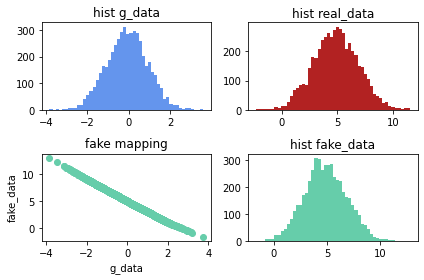

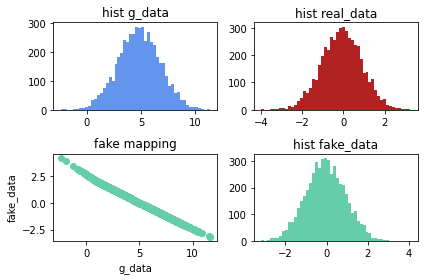

In [10]:
g_data, real_data, fake_data = cyclegan.eval_performance(a2b=True)
plot_alignment_1d(g_data, fake_data, real_data)

g_data, real_data, fake_data = cyclegan.eval_performance(a2b=False)
plot_alignment_1d(g_data, fake_data, real_data)